<a href="https://colab.research.google.com/github/YeabsiraNigusse/Coursera-Deep-Learning-Specialization/blob/main/Course%201/Neural%20Network%20Demo%202/Demo%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planar data classification with Two hidden layer

### Upload all the Nucessary Data and Libreries

In [44]:
from google.colab import files
upload = files.upload()

In [ ]:
!pip install numpy pillow matplotlib scikit-learn

In [46]:
X, Y = load_planar_dataset()

In [47]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets


## Defining The Structure of the Nural Network

In [48]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h1 -- the size of the first hidden layer
    n_h2 -- the size of the second hidden layer
    n_y -- the size of the output layer
    """
    #(≈ 3 lines of code)
    # n_x = ...
    # n_h1 = ...
    # n_h2 = ...
    # n_y = ...
    # YOUR CODE STARTS HERE
    n_x = X.shape[0]
    n_h1 = 4
    n_h2 = 3
    n_y = Y.shape[0]

    # YOUR CODE ENDS HERE
    return (n_x, n_h1, n_h2, n_y)

## Initialize Model Parameter

In [49]:
def initialize_parameters(n_x, n_h1, n_h2, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h1 -- size of the first hidden layer
    n_h2 -- size of the second hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h1, n_x)
                    b1 -- bias vector of shape (n_h1, 1)
                    W2 -- weight matrix of shape (n_h2, n_h1)
                    b2 -- bias vector of shape (n_h2, 1)
                    W3 -- weight matrix of shape(n_y, n_h2)
                    b3 -- weight matrix of shape(n_y, 1)
    """
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = np.random.randn(n_h1, n_x) * 0.01
    b1 = np.zeros((n_h1, 1))
    W2 = np.random.randn(n_h2, n_h1) * 0.01
    b2 = np.zeros((n_h2, 1))
    W3 = np.random.randn(n_y, n_h2)
    b3 = np.zeros((n_y, 1))

    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

## Forward Propagation

In [50]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A3 -- The sigmoid output of the third activation
    cache -- a dictionary containing "Z1", "A1", "Z2" , "A2", "Z3" and "A3"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    # YOUR CODE ENDS HERE

    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # YOUR CODE ENDS HERE

    assert(A3.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3}

    return A3, cache

### Compute the Cost

Now that you've computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for all examples, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [51]:
def compute_cost(A3, Y):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A3 -- The sigmoid output of the third activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    logprobs = np.multiply(np.log(A3), Y) + np.multiply(np.log(1 - A3), 1 - Y)
    cost = -np.sum(logprobs) / m

    # YOUR CODE ENDS HERE

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17

    return cost

### Implement Backpropagation

Using the cache computed during forward propagation, you can now implement backward propagation.


In [57]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters["W3"]

    # YOUR CODE ENDS HERE

    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)
    # A1 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']

    # YOUR CODE ENDS HERE

    # Backward propagation: calculate dW1, db1, dW2, db2.
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dZ2 = np.dot(W3.T, dZ3) * (1 - np.power(A2, 2))
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # YOUR CODE ENDS HERE

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3}

    return grads

## Update the parameters

In [58]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    # YOUR CODE ENDS HERE

    # Retrieve each gradient from the dictionary "grads"
    #(≈ 4 lines of code)
    # dW1 = ...
    # db1 = ...
    # dW2 = ...
    # db2 = ...
    # YOUR CODE STARTS HERE
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']

    # YOUR CODE ENDS HERE

    # Update rule for each parameter
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3

    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

## Integrate

In [59]:
def nn_model(X, Y, n_h1, n_h2, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[3]

    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h1, n_h2, n_y)
    # YOUR CODE ENDS HERE

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...

        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...

        # YOUR CODE STARTS HERE
        A3, cache = forward_propagation(X, parameters)
        cost = compute_cost(A3, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        # YOUR CODE ENDS HERE

        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

# Test the Model

In [60]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A3, cache = forward_propagation(X, parameters)
    predictions = (A3 > 0.5)
    # YOUR CODE ENDS HERE

    return predictions

Cost after iteration 0: 0.693160
Cost after iteration 1000: 0.258175
Cost after iteration 2000: 0.242040
Cost after iteration 3000: 0.244407
Cost after iteration 4000: 0.211427
Cost after iteration 5000: 0.176996
Cost after iteration 6000: 0.174666
Cost after iteration 7000: 0.168977
Cost after iteration 8000: 0.164701
Cost after iteration 9000: 0.164692


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

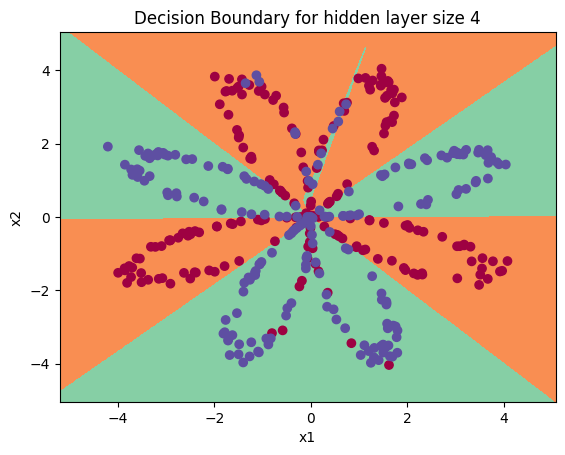

In [63]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h1 = 5, n_h2 = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [64]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


## what I learned from this project

- Building L layer of nural network from scratch
- it is just carfully building the structure of the neural network specially during initialization of the model prameter dimention and calcualting the backward propagation of each parameter and activation function.
- the rest is a matter of writting the code by keeping the flow.